# Assignment wk 2

### 1. Data pre-processing steps

The first step is pre-processing the data. The survey .csv file is not a European dataframe, as the dataframe uses a different seperator. Therefore I first need to change it to European style.

In [124]:
#importing the necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#loading the csv file
df1 = pd.read_csv('steps-Copy1.csv', sep=';')
df2 = pd.read_csv('survey-Copy1.csv')

### 2. Variable mean steps per participant

First I'll combine the two dataframes, so I have the mean of steps in the same dataframe as some qualitative variables such as categorical values such as gender. The mean is influenced by extreme values. Therefore it's important to leave out some extreme values (outliers), to get a more trustworthy outcome.

In [125]:
#First I merge the two files
df_merged = pd.merge(df2, df1, on='id')
df_merged.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df_merged = df_merged.assign(mean_steps_pp = df_merged.mean(axis=1)) #new variable: mean of steps per participant
df_merged['mean_steps_pp'] = df_merged['mean_steps_pp'].round() #round the number
df_merged = df_merged[(df_merged['mean_steps_pp'] < 20000) & (df_merged['weight'] < 200) & (df_merged['height'] > 0)]
df_merged.dropna() #removing all the NaN values
df_merged.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps_pp
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9907.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5520.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8032.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2917.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4866.0


### 3. The relation of meansteps per participant to weight and height

#### 3.1. matrix correlation matrix including all 3 variables

In [127]:
corr = df_merged[['mean_steps_pp', 'height', 'weight']].corr()
corr

,mean_steps_pp,height,weight
mean_steps_pp,1.000000,-0.061827,-0.093165
height,-0.061827,1.000000,0.514601
weight,-0.093165,0.514601,1.000000


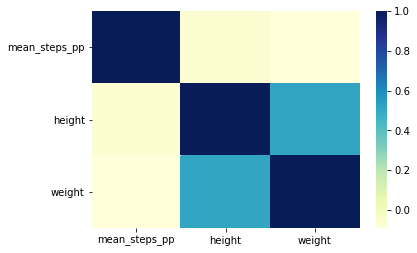

In [128]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='YlGnBu') #the last two arguments set the column names
plt.show()

#### 3.2. Scatter plots of the variable 'height'

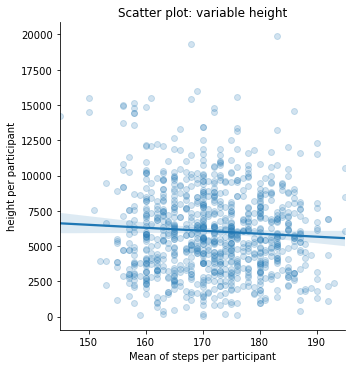

In [129]:
sns.lmplot(x='height', 
           y='mean_steps_pp', 
           fit_reg=True, #fit_reg=True ads the regression line
           data=df_merged, #which dataframe to use
           scatter_kws={'alpha':0.2}) #adding transparency to the scatter plot, to better differentiate the dots
plt.xlabel('Mean of steps per participant')
plt.ylabel('height per participant')
plt.title('Scatter plot: variable height')
plt.show()

#### 3.2. Scatter plots of the variable 'weight'

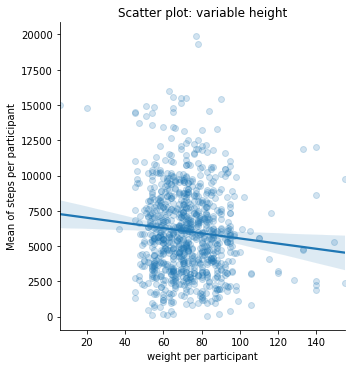

In [130]:
sns.lmplot(x='weight', 
           y='mean_steps_pp', 
           fit_reg=True, #fit_reg=True ads the regression line
           data=df_merged, #which dataframe to use 
           scatter_kws={'alpha':0.2}) #adding transparency to the scatter plot, to better differentiate the dots
plt.xlabel('weight per participant') 
plt.ylabel('Mean of steps per participant')
plt.title('Scatter plot: variable height')
plt.show()

In [131]:
# The pearson correlation for the two variables
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
df_merged2 = df_merged[['mean_steps_pp', 'height', 'weight']]
df_merged2 = df_merged2.copy()
pearsoncorr = df_merged2.corr(method='pearson')
pearsoncorr

,mean_steps_pp,height,weight
mean_steps_pp,1.000000,-0.061827,-0.093165
height,-0.061827,1.000000,0.514601
weight,-0.093165,0.514601,1.000000


Both scatterplots show a linear relation. 
The Pearsons R shows 'almost' a low correlation between weight and mean of steps pp, as it almost reaches the 0.1. This is a very weak correlation, but as most correlations in social science are weak it might still be valuable. The relation between height and mean of steps per participant is just over -0.06 and thus shows almost no relation.

Note:
As the numbers of my correlation a few steps back have the same numbers as the correlation using the pearson method, I'm not sure if I made a mistake somewhere. 

### 4. The relation of mean steps per participant with a qualitative variable

Text(0.5, 1.0, 'Mean of steps per participant in comparison to their city and gender')

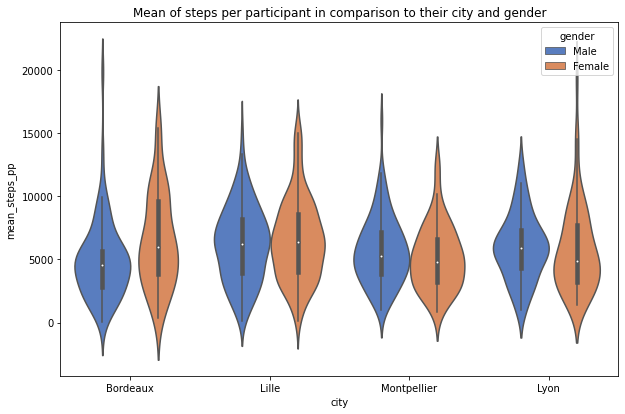

In [132]:
#Visualizing the variables in a violin plot
size = (10, 6.5) #Increasing the size of the graph, in order to read the values better
fig, ax = plt.subplots(figsize=size) 
fig = sns.violinplot(x="city", 
               y="mean_steps_pp", 
               hue="gender",
               data=df_merged, 
               palette="muted",
               figsize=size)
plt.title('Mean of steps per participant in comparison to their city and gender')

The vilolin plot above, shows the relations between the the participants gender, the mean of steps per participant and the city they live in. The interquartile range for women in Bordeaux is more widespread than for men in Bordeaux. So the mean of steps of women is more widespread compared to men. For men in Bordeaux you can see that 50% has a mean of steps that is around 4500, but they have more extreme values that go over the 20000. The difference between men and female in lille are very little. You can see a small difference in the top of the 'violin'. There you can see that the minimum and maximum numbers (mean of steps pp) are quite the same, except the the top of female participants is thicker, which shows more women reach this mean of steps compared to men. 

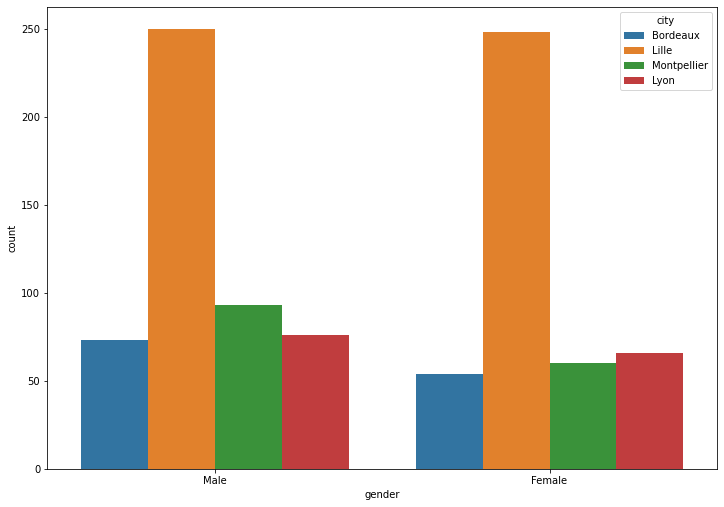

In [133]:
size = (12, 8.5)
fig, ax = plt.subplots(figsize=size)
sns.countplot(x="gender", hue="city", data=df_merged)
plt.show()

The graph above shows the gender per city. Here you can see clearly that the for both female and male there are much more participants from the city Lille. In this database there are more male than female participants. The biggest difference is in Montpellier, where there are around 60 female participants and around 85 male participants.

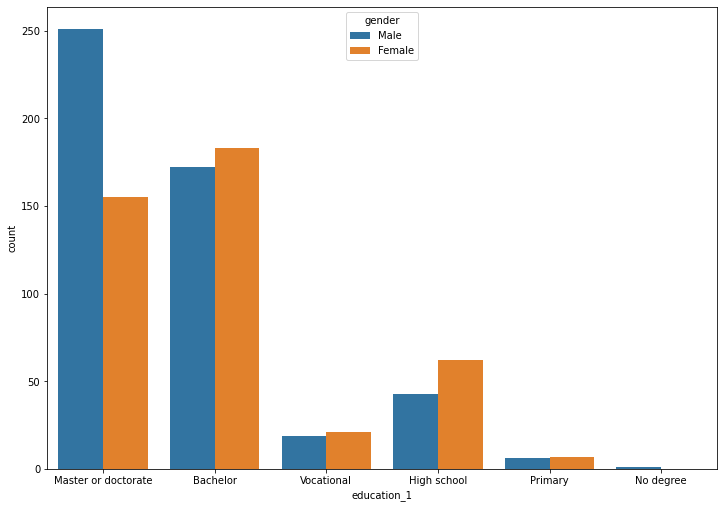

In [134]:
size = (12, 8.5)
fig, ax = plt.subplots(figsize=size)
sns.countplot(x="education_1", hue="gender", data=df_merged)
plt.show()

In the graph above you can see the relation between the gender and education. You can see that more male participants have a master or doctorate degree compared to women. In the other education levels there is less of a difference in gender. As female participants are less represented in having a master or doctorate, they are more spread over the other levels and therefore might score a little bit higher than male participants.

In [135]:
pd.crosstab(df_merged["education_1"], df_merged["city"], normalize='index')

city,Bordeaux,Lille,Lyon,Montpellier
education_1,,,,
Bachelor,0.152113,0.557746,0.123944,0.166197
High school,0.180952,0.600000,0.114286,0.104762
Master or doctorate,0.108374,0.507389,0.192118,0.192118
No degree,0.000000,0.000000,1.000000,0.000000
Primary,0.153846,0.538462,0.307692,0.000000
Vocational,0.200000,0.600000,0.075000,0.125000
